<a href="https://colab.research.google.com/github/yh08037/Introduction-to-Intelligent-Systems/blob/master/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-regeularized regression
## Tasks
### 1. Eead data & Plot values

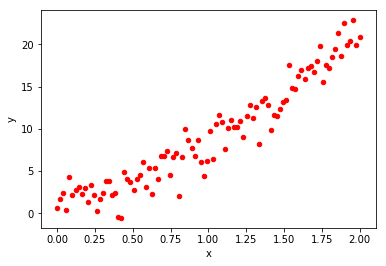

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

name_file = './data_lab1_iis.txt'

columns = ['x', 'y']
data_in = pd.read_csv(name_file, names=columns, sep=' ')

data_in.plot(kind='scatter', x='x', y='y', color='red')
# kind='scatter' means plot as point

x = np.asarray(data_in['x'])
y = np.asarray(data_in['y'])

max_epoch = 10000

N = 1
J = 1
I = len(data_in)  # i : numbers of training data


alpha = 0.001

x = np.concatenate((np.ones(I).reshape(-1, 1), x.reshape(-1, 1)), axis=1)

### Definition of SSE

In [0]:
def SSE(y_hat, y):
    if y_hat.size != y.size:
        print("Unvalid arguments for SSE function")
        exit()

    result = 0.
    for i in range(1, y.size):
        result += float(y_hat[i] - y[i]) ** 2
    return result / 2

### Definition of Linear Relationship

In [0]:
def func(theta, t):
    if theta.size != 2:
        print("Unvalid size of theta")
        exit()
    return float(theta[0]) + float(theta[1]) * t

### 2. Batch Gradient Descent


In [4]:
# initialization

theta_BGD = np.random.rand(N+1, 1)

# main loop
for epoch in range(max_epoch):
    theta_BGD_tp = np.transpose(theta_BGD)
    for n in range(0, N+1):
        sum = 0.
        for i in range(0, I):
            sum += (np.matmul(theta_BGD_tp, x[i]) - y[i]) * x[i][n]
        theta_BGD[n] = theta_BGD[n] - alpha * sum


theta_BGD_tp = np.transpose(theta_BGD)

y_hat_BGD = np.empty((y.size, 1))

for i in range(0, I):
    y_hat_BGD[i] = np.matmul(theta_BGD_tp, x[i])

print(theta_BGD)

error_BGD = SSE(y_hat_BGD, y)
print(error_BGD)

[[-0.94710665]
 [10.23574237]]
181.97108556023034


### 3. Stochastic Gradient Descent

In [5]:
# initialization

theta_SGD = np.random.rand(N+1, 1)

# main loop
for epoch in range(1, max_epoch+1):
    theta_SGD_tp = np.transpose(theta_SGD)
    for n in range(0, N+1):
        i = random.randint(0, I-1)
        theta_SGD[n] -= alpha * (np.matmul(theta_SGD_tp, x[i]) - y[i]) * x[i][n]


theta_SGD_tp = np.transpose(theta_SGD)

y_hat_SGD = np.empty((y.size, 1))

for i in range(0, I):
    y_hat_SGD[i] = np.matmul(theta_SGD_tp, x[i])

print(theta_SGD)

error_SGD = SSE(y_hat_SGD, y)
print(error_SGD)

[[0.17644836]
 [9.29952295]]
199.83283941106032


### 4. Ordinary Least Squares

In [6]:
x_tp = np.transpose(x)

theta_OLS = np.matmul(np.matmul(np.linalg.inv(np.matmul(x_tp, x)), x_tp), y)
theta_OLS_tp = np.transpose(theta_OLS)

print(theta_OLS)

y_hat_OLS = np.empty((y.size, 1))

for i in range(0, I):
    y_hat_OLS[i] = np.matmul(theta_OLS_tp, x[i])

error_OLS = SSE(y_hat_OLS, y)
print(error_OLS)

[-0.94710665 10.23574237]
181.97108556023025


### 5. Plot Linear Regressors over Original Dataset

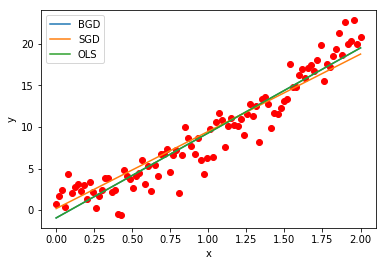

In [7]:
t = np.asarray(data_in['x'])

plt.plot(t, y, 'ro') #'ro' means red dot
plt.xlabel('x')
plt.ylabel('y')

plt.plot(t, func(theta_BGD, t), label = "BGD")
plt.plot(t, func(theta_SGD, t), label = "SGD")
plt.plot(t, func(theta_OLS, t), label = "OLS")

plt.legend()

plt.show()

### 6. Test model with new data

iris setosa data

X = number of claims

Y = total payment for all the claims in thousands of Swedish Kronor
for geographical zones in Sweden

Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance

source: https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


[[2.72317395]
 [0.66393618]]
1.531663515803789
[[1.34917932]
 [1.05191099]]
2.085850580603128
[2.73301864 0.66110839]
1.5316332466360358


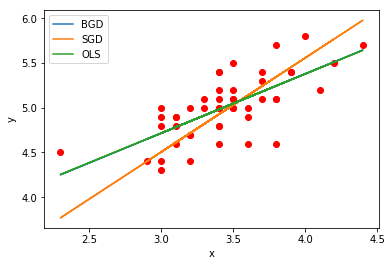

In [8]:
name_file = './test.txt'

columns = ['x', 'y']
data_in = pd.read_csv(name_file, names=columns, sep='\t')

data_in.plot(kind='scatter', x='x', y='y', color='red')
# kind='scatter' means plot as point

x = np.asarray(data_in['x'])
y = np.asarray(data_in['y'])

max_epoch = 10000

N = 1
J = 1
I = len(data_in)  # i : numbers of training data


alpha = 0.001

x = np.concatenate((np.ones(I).reshape(-1, 1), x.reshape(-1, 1)), axis=1)




# initialization

theta_BGD = np.random.rand(N+1, 1)

# main loop
for epoch in range(max_epoch):
    theta_BGD_tp = np.transpose(theta_BGD)
    for n in range(0, N+1):
        sum = 0.
        for i in range(0, I):
            sum += (np.matmul(theta_BGD_tp, x[i]) - y[i]) * x[i][n]
        theta_BGD[n] = theta_BGD[n] - alpha * sum


theta_BGD_tp = np.transpose(theta_BGD)

y_hat_BGD = np.empty((y.size, 1))

for i in range(0, I):
    y_hat_BGD[i] = np.matmul(theta_BGD_tp, x[i])

print(theta_BGD)

error_BGD = SSE(y_hat_BGD, y)
print(error_BGD)




# initialization

theta_SGD = np.random.rand(N+1, 1)

# main loop
for epoch in range(1, max_epoch+1):
    theta_SGD_tp = np.transpose(theta_SGD)
    for n in range(0, N+1):
        i = random.randint(0, I-1)
        theta_SGD[n] -= alpha * (np.matmul(theta_SGD_tp, x[i]) - y[i]) * x[i][n]


theta_SGD_tp = np.transpose(theta_SGD)

y_hat_SGD = np.empty((y.size, 1))

for i in range(0, I):
    y_hat_SGD[i] = np.matmul(theta_SGD_tp, x[i])

print(theta_SGD)

error_SGD = SSE(y_hat_SGD, y)
print(error_SGD)




x_tp = np.transpose(x)

theta_OLS = np.matmul(np.matmul(np.linalg.inv(np.matmul(x_tp, x)), x_tp), y)
theta_OLS_tp = np.transpose(theta_OLS)

print(theta_OLS)

y_hat_OLS = np.empty((y.size, 1))

for i in range(0, I):
    y_hat_OLS[i] = np.matmul(theta_OLS_tp, x[i])

error_OLS = SSE(y_hat_OLS, y)
print(error_OLS)



t = np.asarray(data_in['x'])

plt.plot(t, y, 'ro') #'ro' means red dot
plt.xlabel('x')
plt.ylabel('y')

plt.plot(t, func(theta_BGD, t), label = "BGD")
plt.plot(t, func(theta_SGD, t), label = "SGD")
plt.plot(t, func(theta_OLS, t), label = "OLS")

plt.legend()

plt.show()